In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('Data/13000_triv_nontriv_spdf_binary.csv',index_col=[0])
pt=pd.read_csv('Data/PeriodicTablesdpf.csv')

In [3]:
data.head()

,NoE,Stoich. Formula,SG,Point Group,Top_Class,onsite_en,split,feat_vector,s_bin,p_bin,...,F_mean,F_var,row_mean,row_var,col_mean,col_var,en_mean,en_var,rad_mean,rad_var
0,252,YCu(WO4)2,1,C1,0,0.035680,"['Y', 'Cu', 'W', 'O', 'O', 'O', 'O', 'W', 'O',...","[2.0, 0.0, 2.6666666666666665, 1.8856180831641...",1,1,...,2.333333,5.217492,3.083333,1.605113,26.833333,4.775516,2.946667,0.747901,1.091667,0.640909
1,144,TeSeO4,1,C1,0,0.035680,"['Te', 'Se', 'O', 'O', 'O', 'O']","[2.0, 0.0, 4.0, 0.0, 3.3333333333333335, 4.714...",1,1,...,0.000000,0.000000,2.833333,1.213352,30.000000,0.000000,3.068333,0.541431,0.866667,0.311805
2,208,SrCaB5H2ClO10,1,C1,0,0.035680,"['Sr', 'Ca', 'B', 'B', 'B', 'B', 'B', 'H', 'H'...","[1.9, 0.3, 2.5, 1.8027756377319946, 0.0, 0.0, ...",1,1,...,0.000000,0.000000,2.200000,0.871780,23.600000,11.128342,2.705500,0.846094,0.987500,0.509950
3,104,Si4P4Ru,1,C1,0,0.051441,"['Si', 'Si', 'Si', 'Si', 'P', 'P', 'P', 'P', '...","[2.0, 0.0, 2.2222222222222223, 0.9162456945817...",1,1,...,0.000000,0.000000,3.222222,0.628539,27.777778,2.096440,2.062222,0.145127,1.411111,0.223331
4,128,Si3P2Pt,1,C1,0,0.019080,"['Si', 'Si', 'Si', 'P', 'P', 'Pt']","[2.0, 0.0, 2.0, 1.0, 1.3333333333333333, 2.981...",1,1,...,2.333333,5.217492,3.500000,1.118034,27.666667,1.699673,2.060000,0.162788,1.450000,0.206155


In [3]:
data.dropna(inplace=True)

In [4]:
data.isna().sum()

NoE                0
Stoich. Formula    0
SG                 0
Point Group        0
Top_Class          0
split              0
feat_vector        0
s_bin              0
p_bin              0
d_bin              0
f_bin              0
S_mean             0
S_var              0
P_mean             0
P_var              0
D_mean             0
D_var              0
F_mean             0
F_var              0
row_mean           0
row_var            0
col_mean           0
col_var            0
en_mean            0
en_var             0
rad_mean           0
rad_var            0
onsite_en          0
dtype: int64

In [3]:
y=data['Top_Class']
data=data.drop(['split','Stoich. Formula','feat_vector','rad_mean','rad_var','Top_Class'],axis=1)

In [5]:
data.columns

Index(['NoE', 'SG', 'Point Group', 's_bin', 'p_bin', 'd_bin', 'f_bin',
       'S_mean', 'S_var', 'P_mean', 'P_var', 'D_mean', 'D_var', 'F_mean',
       'F_var', 'row_mean', 'row_var', 'col_mean', 'col_var', 'en_mean',
       'en_var', 'onsite_en'],
      dtype='object')

In [7]:
# import numpy as np
# import pandas as pd
# from sklearn import tree
# from sklearn.model_selection import GridSearchCV
# parameters = {'criterion':['gini','entropy'],'max_depth':range(3,10)}
# clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4,cv=15)
# clf.fit(X=x, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

In [4]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Point Group']= label_encoder.fit_transform(data['Point Group'])
data['Point Group'].unique()

array([ 0, 13,  1, 14,  2, 15,  3, 17,  7, 27,  8, 21,  9, 16, 22,  4, 28,
       18,  6, 19, 10,  5, 11, 23, 12, 20, 24, 29, 31, 25, 30, 26])

In [9]:
data.head()

,NoE,SG,Point Group,onsite_en,s_bin,p_bin,d_bin,f_bin,S_mean,S_var,...,D_mean,D_var,F_mean,F_var,row_mean,row_var,col_mean,col_var,en_mean,en_var
0,252,1,0,0.035680,1,1,1,1,2.0,0.0,...,1.500000,2.692582,2.333333,5.217492,3.083333,1.605113,26.833333,4.775516,2.946667,0.747901
1,144,1,0,0.035680,1,1,1,0,2.0,0.0,...,3.333333,4.714045,0.000000,0.000000,2.833333,1.213352,30.000000,0.000000,3.068333,0.541431
2,208,1,0,0.035680,1,1,0,0,1.9,0.3,...,0.000000,0.000000,0.000000,0.000000,2.200000,0.871780,23.600000,11.128342,2.705500,0.846094
3,104,1,0,0.051441,1,1,1,0,2.0,0.0,...,0.666667,1.885618,0.000000,0.000000,3.222222,0.628539,27.777778,2.096440,2.062222,0.145127
4,128,1,0,0.019080,1,1,1,1,2.0,0.0,...,1.333333,2.981424,2.333333,5.217492,3.500000,1.118034,27.666667,1.699673,2.060000,0.162788


In [10]:
# #import category_encoders as ce
# data_encoded=pd.get_dummies(data=x['Point Group'],drop_first=True)
# data_encoded

In [5]:
x=data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.2, random_state=42)

In [10]:
from sklearn import tree
dt=tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
y_pred=dt.predict(X_test)

In [12]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_recall_fscore_support(y_test,y_pred))

0.7592240395587676
(array([0.88986014, 0.7176781 , 0.59363958, 0.61946903, 0.67768595]), array([0.87082977, 0.68      , 0.61090909, 0.63253012, 0.72406181]), array([0.88024211, 0.69833119, 0.60215054, 0.62593145, 0.70010672]), array([1169,  400,  275,  332,  453]))


In [16]:
y_pred_train = dt.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))
# Overfitting!

0.9956900773827015


In [17]:
import sklearn
sklearn.set_config(print_changed_only=False)
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
dt.get_depth()

29

In [19]:
dt.get_n_leaves()

1864

In [20]:
col_list = np.array(x.columns).reshape(-1,1)
col_list = col_list.flatten()

In [21]:
%matplotlib inline

Feature: NoE, Score: 0.20892
Feature: SG, Score: 0.14891
Feature: Point Group, Score: 0.02608
Feature: onsite_en, Score: 0.02959
Feature: s_bin, Score: 0.00000
Feature: p_bin, Score: 0.00077
Feature: d_bin, Score: 0.00566
Feature: f_bin, Score: 0.02438
Feature: S_mean, Score: 0.01420
Feature: S_var, Score: 0.00749
Feature: P_mean, Score: 0.04888
Feature: P_var, Score: 0.02515
Feature: D_mean, Score: 0.04222
Feature: D_var, Score: 0.05674
Feature: F_mean, Score: 0.01806
Feature: F_var, Score: 0.03226
Feature: row_mean, Score: 0.03597
Feature: row_var, Score: 0.03161
Feature: col_mean, Score: 0.07180
Feature: col_var, Score: 0.05780
Feature: en_mean, Score: 0.05246
Feature: en_var, Score: 0.06105


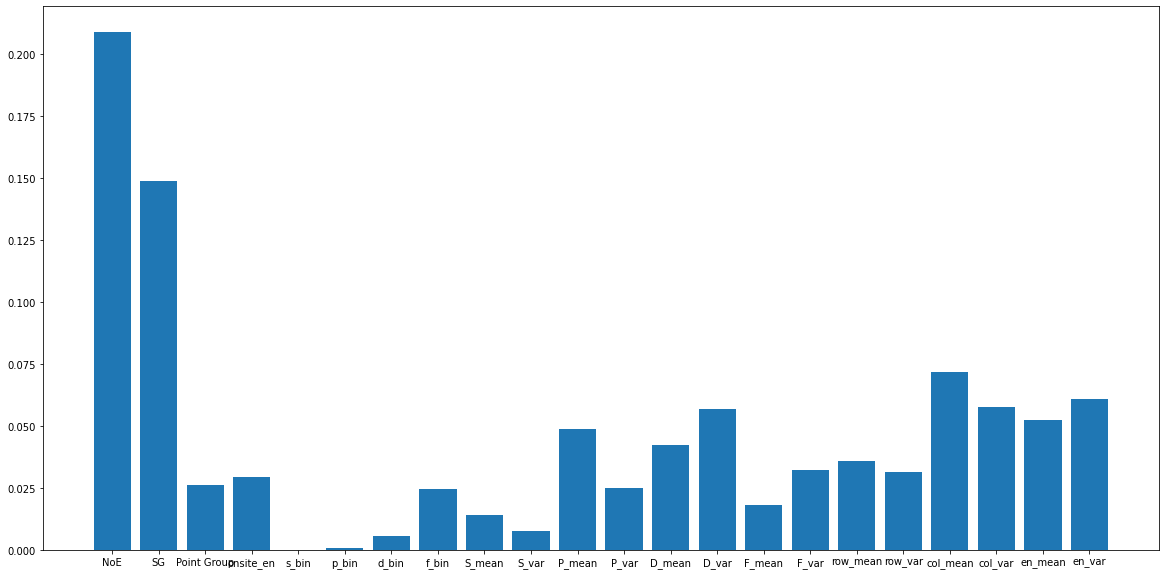

In [22]:
importance = dt.feature_importances_
#import matplotlib.pyplot
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: {col_list[i]}, Score: %.5f' % (v))
# plot feature importance
fig, ax = plt.subplots(figsize=(20,10))
plt.bar([x for x in range(len(importance))], importance)
x_axis=np.arange(len(importance))
plt.xticks(x_axis, list(x.columns))
plt.show()

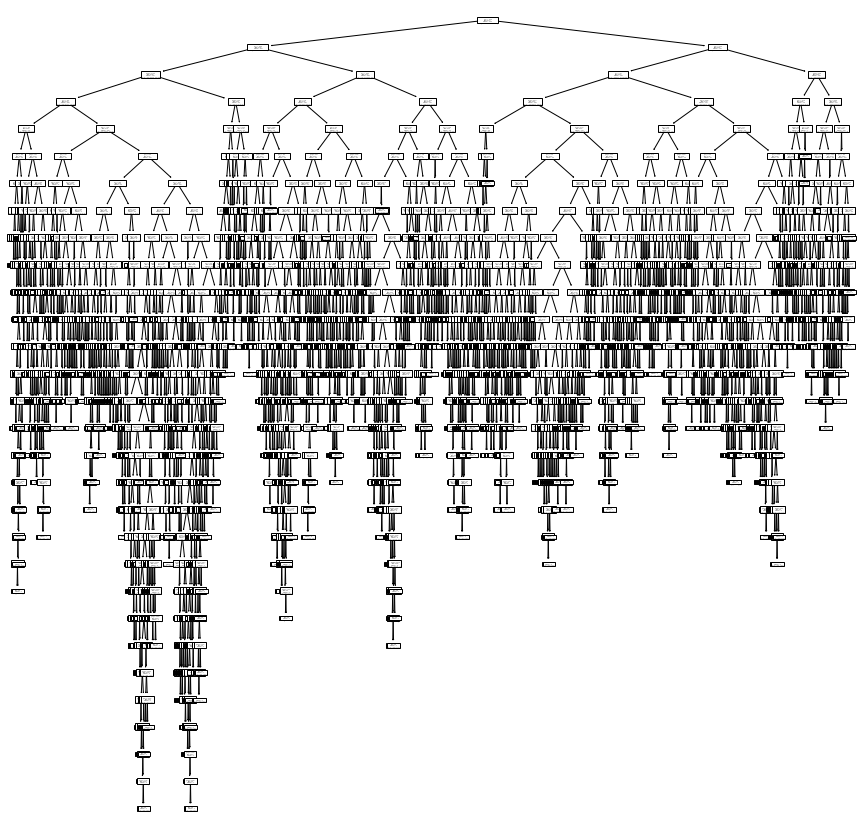

In [23]:
from matplotlib.pyplot import figure

figure(figsize=(15,15))
plt.show(tree.plot_tree(dt))


In [24]:
# import numpy as np
# import pandas as pd
# from sklearn import tree
# from sklearn.model_selection import GridSearchCV

# #features = []


# parameters = {'max_depth':range(3,20)}
# clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
# clf.fit(X=x, y=y)
# tree_model = clf.best_estimator_
# print (clf.best_score_, clf.best_params_) 

In [25]:
# #Random Forest
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_informative=2, n_redundant=0,
#                            random_state=0, shuffle=False)
# rf = RandomForestClassifier(max_depth=2, random_state=0)
# rf.fit(X_train, y_train)

In [26]:
# y_prerf=rf.predict(X_test)

In [27]:
# print(metrics.accuracy_score(y_test, y_prerf))

In [28]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(out_file='tree.dot', 
#                 feature_names = ['NoE','SG','s_bin','p_bin','d_bin','f_bin'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

In [21]:
param_grid = {'eta':[0.01,0.03,0.1,0.3,1],'max_depth':[10,20,30,50,70,100,200],'min_child_weight':[5,6,7,8],'colsample_bytree' : [0.5,0.6,0.7,0.8,0.9,1],'alpha' : [0.01,0.03,0.1,0.3,1,10,30]}

In [14]:
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [25]:
y_train = y_train.astype('int')

In [ ]:
#params = {'colsample_bytree': [0.3],'learning_rate': [0.1],
#                'max_depth': [12], 'alpha': [5]}

model = XGBClassifier(use_label_encoder=False)
gs = RandomizedSearchCV(model,param_distributions = param_grid, n_jobs = -1, scoring = metrics.accuracy_score,n_iter = 50)
results = gs.fit(X_train,y_train)

In [22]:
pd.DataFrame(results.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_scale_pos_weight,param_min_child_weight,param_max_depth,param_eta,param_colsample_bytree,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,88.025499,0.438491,0.009716,0.004177,1,5,100,0.1,0.9,1,"{'scale_pos_weight': 1, 'min_child_weight': 5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,89.494200,5.281578,0.006561,0.001298,1,5,30,0.1,0.9,0.3,"{'scale_pos_weight': 1, 'min_child_weight': 5,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,74.165085,0.768215,0.005016,0.001128,1,8,20,0.03,0.5,0.03,"{'scale_pos_weight': 1, 'min_child_weight': 8,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,33.821233,0.966553,0.005044,0.002119,1,8,20,1,0.7,0.1,"{'scale_pos_weight': 1, 'min_child_weight': 8,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,90.370822,0.291856,0.004767,0.000515,100,5,20,0.03,0.7,0.3,"{'scale_pos_weight': 100, 'min_child_weight': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
5,31.809647,0.675469,0.004460,0.001861,10,7,70,1,0.5,1,"{'scale_pos_weight': 10, 'min_child_weight': 7...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
6,9.091394,0.362760,0.002747,0.002910,10,5,70,1,0.8,30,"{'scale_pos_weight': 10, 'min_child_weight': 5...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
7,55.218442,0.272955,0.004496,0.001654,1,8,200,0.3,0.5,0.03,"{'scale_pos_weight': 1, 'min_child_weight': 8,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
8,57.519622,2.724780,0.004808,0.001285,5,8,200,0.3,0.5,0.01,"{'scale_pos_weight': 5, 'min_child_weight': 8,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
9,83.319705,0.304713,0.004765,0.000480,100,8,20,0.1,1,0.01,"{'scale_pos_weight': 100, 'min_child_weight': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20


In [23]:
results.best_params_

{'scale_pos_weight': 1,
 'min_child_weight': 5,
 'max_depth': 100,
 'eta': 0.1,
 'colsample_bytree': 0.9,
 'alpha': 1}

In [11]:
clf = XGBClassifier(**results.best_params_)
clf.fit(X_train,y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:28:50] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:28:50] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [25]:
display(metrics.precision_recall_fscore_support(y_train,y_pred_train))

(array([0.99695718, 0.98387097, 0.9962406 , 0.98346513, 0.99475891]),
 array([0.99956418, 0.98133848, 0.98330241, 0.98488121, 0.99684874]),
 array([0.99825898, 0.98260309, 0.98972923, 0.98417266, 0.99580273]),
 array([4589, 1554, 1078, 1389, 1904]))

In [26]:
metrics.precision_recall_fscore_support(y_test,y_pred_test)

(array([0.92019544, 0.86567164, 0.67636364, 0.75      , 0.80679406]),
 array([0.96663815, 0.725     , 0.67636364, 0.72289157, 0.8388521 ]),
 array([0.94284522, 0.78911565, 0.67636364, 0.73619632, 0.82251082]),
 array([1169,  400,  275,  332,  453]))

In [28]:
metrics.accuracy_score(y_test,y_pred_test)

0.8467097755800684

In [30]:
y_prexg=xgbo.predict(X_test)
print(metrics.accuracy_score(y_test, y_prexg))

0.7688993341167254


In [29]:
from sklearn.model_selection import cross_val_score
clf = XGBClassifier(**results.best_params_)
res = cross_val_score(clf,X_train,y_train,n_jobs=-1)
res

/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/chaithanya/opt/anaconda3/lib/python3.9/site-package

array([0.83119353, 0.82691393, 0.84165478, 0.82596291, 0.82112274])

In [31]:
np.mean(res)

0.8293695789577031

[17:48:49] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:48:49] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:48:49] WARNING: ../src/learner.cc:576: 
Parameters: { "scale_pos_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:48:49] WA

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

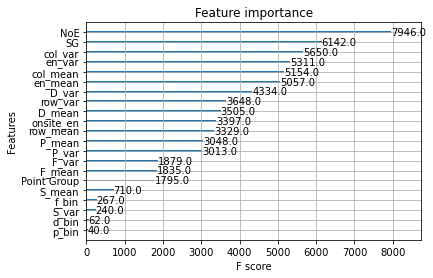

In [12]:
from xgboost import plot_importance
plot_importance(clf, )